In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [36]:
(X_train, y_train), (X_text, y_test) = tf.keras.datasets.mnist.load_data()

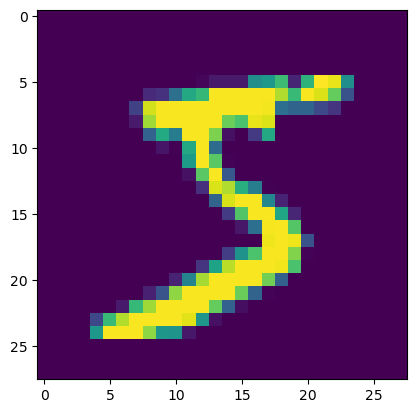

In [37]:
plt.imshow(X_train[0])

In [38]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [39]:
y_train == 0

array([False,  True, False, ..., False, False, False])

In [40]:
only_zeros = X_train[y_train == 0]

In [41]:
only_zeros.shape

(5923, 28, 28)

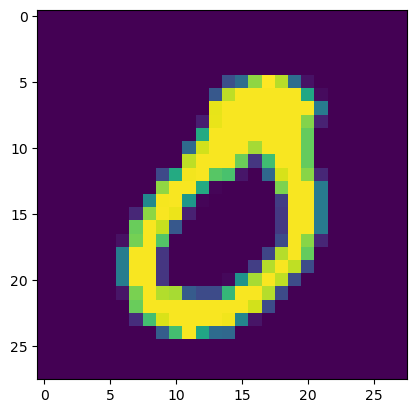

In [42]:
plt.imshow(only_zeros[9])

# Create the Discriminator

In [43]:
models = tf.keras.models
layers = tf.keras.layers

In [44]:
discriminator = models.Sequential([
    layers.Flatten(input_shape=[28,28]),
    layers.Dense(150, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

discriminator.compile(loss='binary_crossentropy', optimizer='adam')

# Generator

In [45]:
coding_size = 100

generator = models.Sequential([
    layers.Dense(100, activation='relu', input_shape=[coding_size]),
    layers.Dense(150, activation='relu'),
    layers.Dense(784, activation='relu'),
    layers.Reshape([28,28])
])

In [46]:
GAN = models.Sequential([generator, discriminator])

In [47]:
discriminator.trainable = False

In [48]:
GAN.compile(loss='binary_crossentropy', optimizer='adam')

In [49]:
batch_size = 32

In [50]:
my_data = only_zeros

In [51]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [52]:
type(dataset)

tensorflow.python.data.ops.shuffle_op._ShuffleDataset

In [53]:
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [54]:
epochs = 1

In [55]:
GAN

In [56]:
GAN.layers

In [57]:
GAN.layers[0]

In [58]:
GAN.layers[0].layers

In [73]:
generator, discriminator = GAN.layers

for epoch in  range(epochs):
    print(f'Currently at epoch {epoch+1}')
    i=0
    
    for X_batch in dataset:
        i = i+1

        if i%10 == 0:
            print(f'\t Curently on batch number {i} of {(len(my_data) // batch_size)}')

        # Discriminator Training Phase
        noise = tf.random.normal(shape=[batch_size, coding_size])
        gen_images = generator(noise)

        X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch, tf.float32)], axis=0)

        y1 = tf.constant([[0.0]] * batch_size + [[1.0]] * batch_size)

        discriminator.trainable = True

        discriminator.train_on_batch(X_fake_vs_real, y1)

        # Generator Training Phase

        noise = tf.random.normal(shape=[batch_size, coding_size])

        y2 = tf.constant([[1.0]] * batch_size)

        discriminator.trainable = False

        GAN.train_on_batch(noise, y2)

print('Training complete')


Currently at epoch 1
	 Curently on batch number 10 of 185
	 Curently on batch number 20 of 185
	 Curently on batch number 30 of 185
	 Curently on batch number 40 of 185
	 Curently on batch number 50 of 185
	 Curently on batch number 60 of 185
	 Curently on batch number 70 of 185
	 Curently on batch number 80 of 185
	 Curently on batch number 90 of 185
	 Curently on batch number 100 of 185
	 Curently on batch number 110 of 185
	 Curently on batch number 120 of 185
	 Curently on batch number 130 of 185
	 Curently on batch number 140 of 185
	 Curently on batch number 150 of 185
	 Curently on batch number 160 of 185
	 Curently on batch number 170 of 185
	 Curently on batch number 180 of 185
Training complete


In [74]:
noise = tf.random.normal(shape=[10, coding_size])

In [75]:
noise.shape

TensorShape([10, 100])

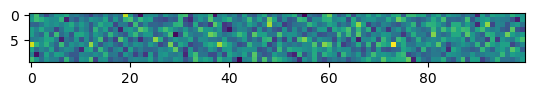

In [76]:
plt.imshow(noise)

In [77]:
images = generator(noise)

In [78]:
images.shape

TensorShape([10, 28, 28])

In [79]:
images[0]

<tf.Tensor: shape=(28, 28), dtype=float32, numpy=
array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.19677158,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 

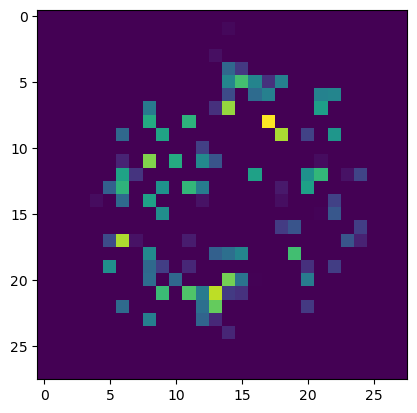

In [81]:
plt.imshow(images[1])